__About Dataset:__
- Age: Age of the candidate
- Gender: Gneder of the candidate
- EducationLevel: Highest level of education attained by the candidate(1:Bachelor's (Type 1), 2: Bachelor's (Type 2) 3: Master's, 4: PhDs)
- ExperienceYears: Number of years of professional experience
- PreviousCompanies: Number of previous companies where the candidate has worked
- Distance From Company: Distance in kilometers from the candidate's residence to the hiring company
- Interview Score: Score achieved by the candidate in the interview process
- Skill Score: Assessment score of the candidate's technical skills
- Personality Score: Evaluation score of the candidate's personality traits
- Recruitment Strategy: Strategy adopted by the hiring team for recruitment(1: Aggressive, 2: Moderate, 3: Conservative)
- Hiring Decision (Target Variable): Outcome of the hiring decision <br/> If you need more information about dataset you can check [here](https://www.kaggle.com/datasets/rabieelkharoua/predicting-hiring-decisions-in-recruitment-data/data)


In [308]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [309]:
df = pd.read_csv('recruitment_data.csv')

In [310]:
df.head()

,Age,Gender,EducationLevel,ExperienceYears,PreviousCompanies,DistanceFromCompany,InterviewScore,SkillScore,PersonalityScore,RecruitmentStrategy,HiringDecision
0,26,1,2,0,3,26.783828,48,78,91,1,1
1,39,1,4,12,3,25.862694,35,68,80,2,1
2,48,0,2,3,2,9.920805,20,67,13,2,0
3,34,1,2,5,2,6.407751,36,27,70,3,0
4,30,0,1,6,1,43.105343,23,52,85,2,0


In [311]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  1500 non-null   int64  
 1   Gender               1500 non-null   int64  
 2   EducationLevel       1500 non-null   int64  
 3   ExperienceYears      1500 non-null   int64  
 4   PreviousCompanies    1500 non-null   int64  
 5   DistanceFromCompany  1500 non-null   float64
 6   InterviewScore       1500 non-null   int64  
 7   SkillScore           1500 non-null   int64  
 8   PersonalityScore     1500 non-null   int64  
 9   RecruitmentStrategy  1500 non-null   int64  
 10  HiringDecision       1500 non-null   int64  
dtypes: float64(1), int64(10)
memory usage: 129.0 KB


In [312]:
df.isnull().sum()

Age                    0
Gender                 0
EducationLevel         0
ExperienceYears        0
PreviousCompanies      0
DistanceFromCompany    0
InterviewScore         0
SkillScore             0
PersonalityScore       0
RecruitmentStrategy    0
HiringDecision         0
dtype: int64

In [313]:
df.describe()

,Age,Gender,EducationLevel,ExperienceYears,PreviousCompanies,DistanceFromCompany,InterviewScore,SkillScore,PersonalityScore,RecruitmentStrategy,HiringDecision
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.00000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000
mean,35.148667,0.492000,2.188000,7.694000,3.00200,25.505379,50.564000,51.116000,49.387333,1.893333,0.310000
std,9.252728,0.500103,0.862449,4.641414,1.41067,14.567151,28.626215,29.353563,29.353201,0.689642,0.462647
min,20.000000,0.000000,1.000000,0.000000,1.00000,1.031376,0.000000,0.000000,0.000000,1.000000,0.000000
25%,27.000000,0.000000,2.000000,4.000000,2.00000,12.838851,25.000000,25.750000,23.000000,1.000000,0.000000
50%,35.000000,0.000000,2.000000,8.000000,3.00000,25.502239,52.000000,53.000000,49.000000,2.000000,0.000000
75%,43.000000,1.000000,3.000000,12.000000,4.00000,37.737996,75.000000,76.000000,76.000000,2.000000,1.000000
max,50.000000,1.000000,4.000000,15.000000,5.00000,50.992462,100.000000,100.000000,100.000000,3.000000,1.000000


In [314]:
df.duplicated().sum()

0

In [315]:
df.shape

(1500, 11)

# Exploratory Data Analysis (EDA)

Text(0.5, 1.0, 'Gender vs Hiring Decision')

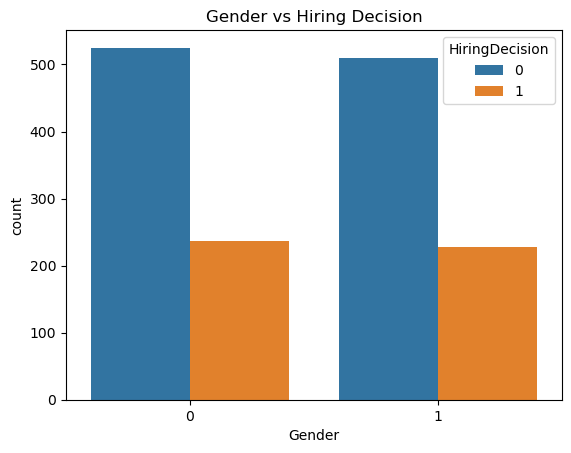

In [317]:
sns.countplot(data=df, x='Gender', hue='HiringDecision')
plt.title('Gender vs Hiring Decision')

Text(0.5, 1.0, 'Distance From Company Distribution')

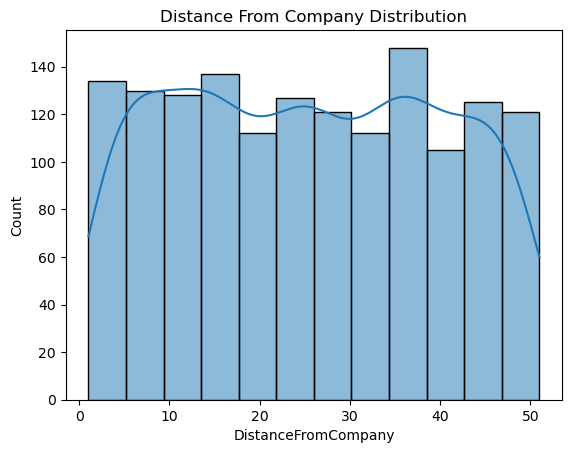

In [318]:
sns.histplot(df['DistanceFromCompany'], kde=True)
plt.title('Distance From Company Distribution')

Text(0.5, 1.0, 'Age Distribution')

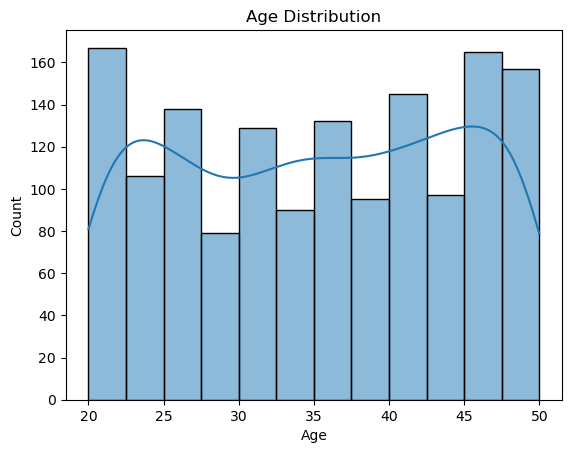

In [319]:
sns.histplot(df['Age'], kde=True)
plt.title('Age Distribution')

Text(0.5, 1.0, 'Interview Score Distribution')

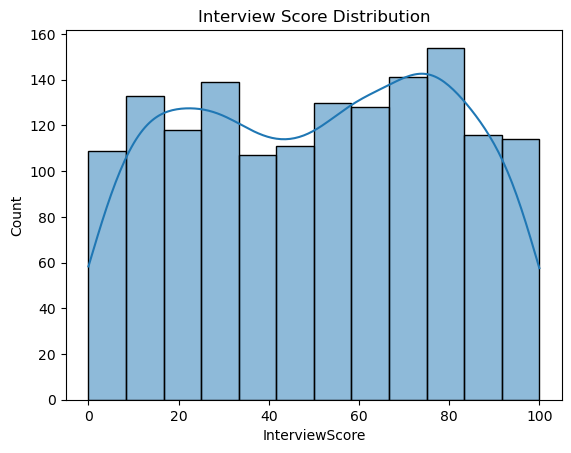

In [320]:
sns.histplot(df['InterviewScore'], kde=True)
plt.title('Interview Score Distribution')

Text(0.5, 1.0, 'Years of Exprience vs HiringDecision')

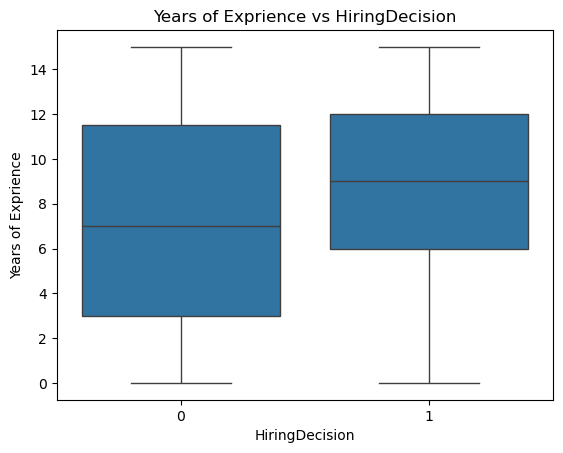

In [321]:
sns.boxplot(data=df, y='ExperienceYears', x='HiringDecision')
plt.ylabel('Years of Exprience')
plt.title('Years of Exprience vs HiringDecision')

Text(0.5, 1.0, 'Age by Gender and HiringDecision')

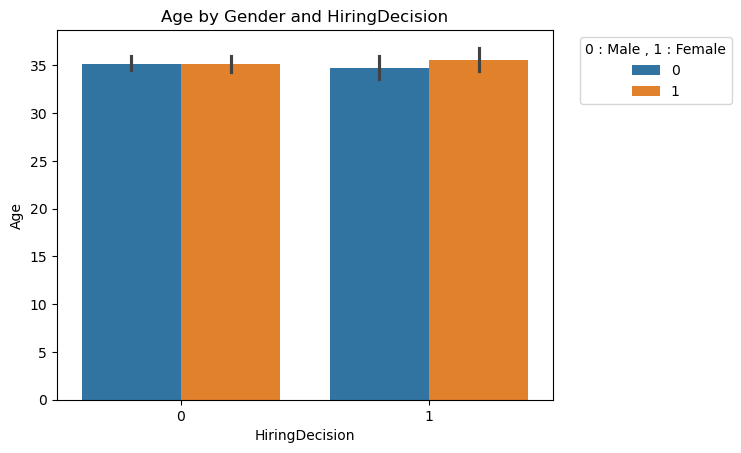

In [322]:
sns.barplot(data=df, y='Age', x='HiringDecision', hue='Gender')
plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left", title='0 : Male , 1 : Female')
plt.title('Age by Gender and HiringDecision')

Text(0.5, 1.0, 'SkillScore vs EducationLevel')

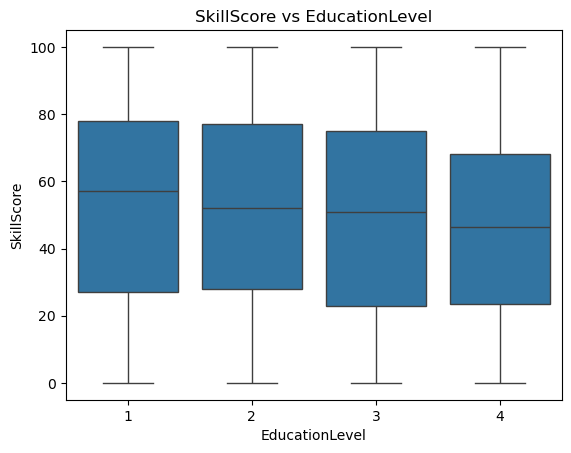

In [323]:
sns.boxplot(x='EducationLevel', y='SkillScore', data=df)
plt.title('SkillScore vs EducationLevel')

Text(0.5, 1.0, 'RecruitmentStrategy by HiringDecision')

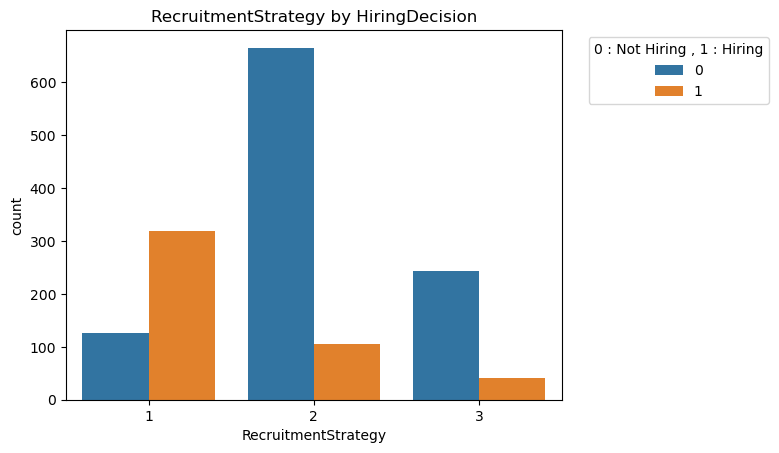

In [324]:
sns.countplot(data=df, x='RecruitmentStrategy', hue='HiringDecision')
plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left", title='0 : Not Hiring , 1 : Hiring')
plt.title('RecruitmentStrategy by HiringDecision')

Text(0.5, 1.0, 'InterviewScore by RecruitmentStrategy and HiringDecision')

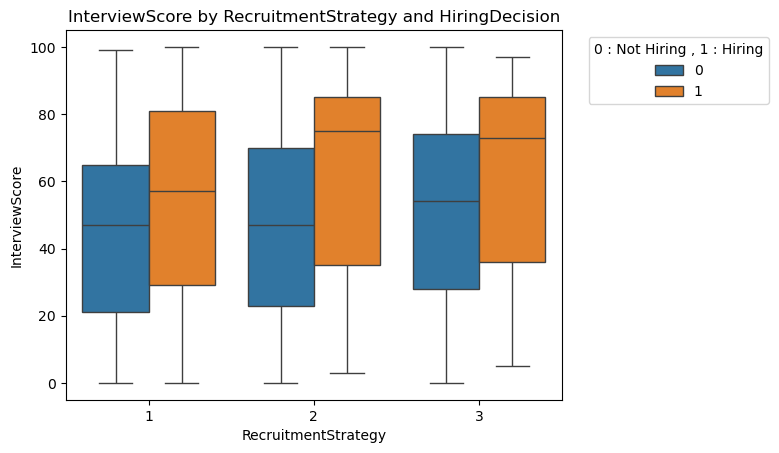

In [325]:
sns.boxplot(x='RecruitmentStrategy', y='InterviewScore', hue='HiringDecision', data=df)
plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left", title='0 : Not Hiring , 1 : Hiring')
plt.title('InterviewScore by RecruitmentStrategy and HiringDecision')

Text(0.5, 1.0, 'InterviewScore vs SkillScore')

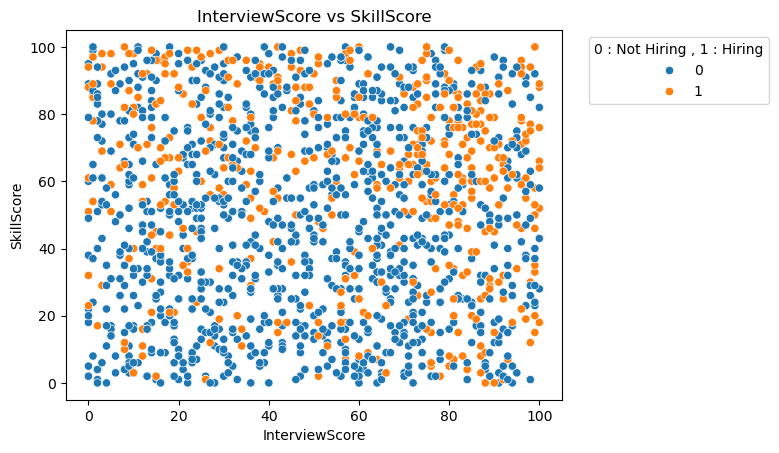

In [326]:
sns.scatterplot(x='InterviewScore', y='SkillScore', hue='HiringDecision', data=df)
plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left", title='0 : Not Hiring , 1 : Hiring')
plt.title('InterviewScore vs SkillScore')

Text(0.5, 1.0, 'SkillScore by EducationLevel and HiringDecision')

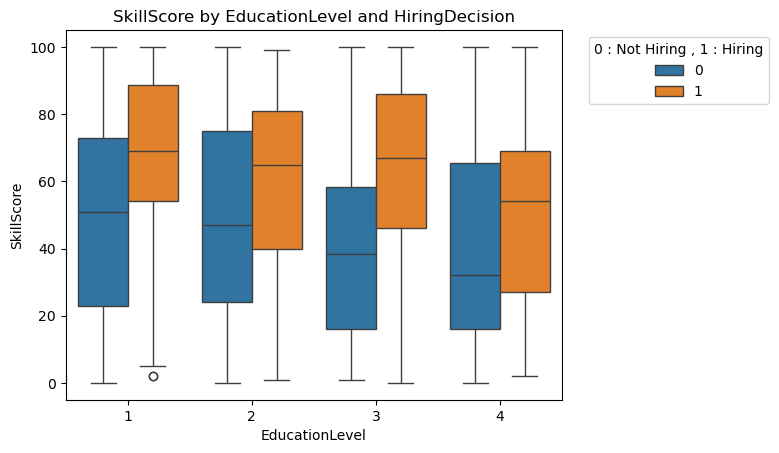

In [327]:
sns.boxplot(x='EducationLevel', y='SkillScore', data=df, hue='HiringDecision')
plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left", title='0 : Not Hiring , 1 : Hiring')
plt.title('SkillScore by EducationLevel and HiringDecision')

Text(0.5, 1.0, 'PersonalityScore vs HiringDecision')

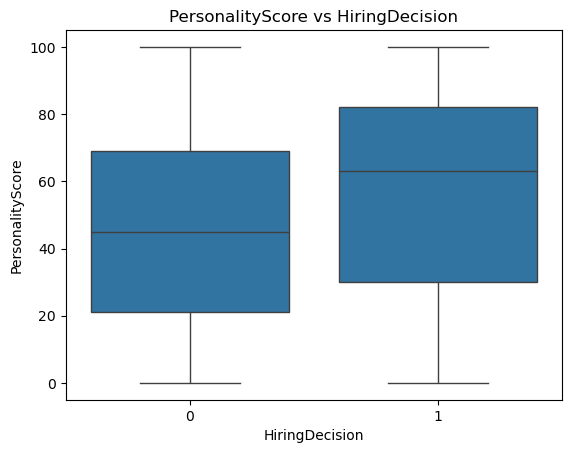

In [328]:
sns.boxplot(x='HiringDecision', y='PersonalityScore', data=df)
plt.title('PersonalityScore vs HiringDecision')

Text(0, 0.5, '')

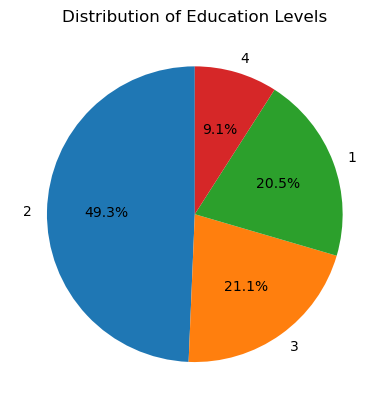

In [329]:
edu_level_counts = df['EducationLevel'].value_counts(normalize=True) * 100
edu_level_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title("Distribution of Education Levels")
plt.ylabel('')

In [330]:
corr_matrix = df.corr()

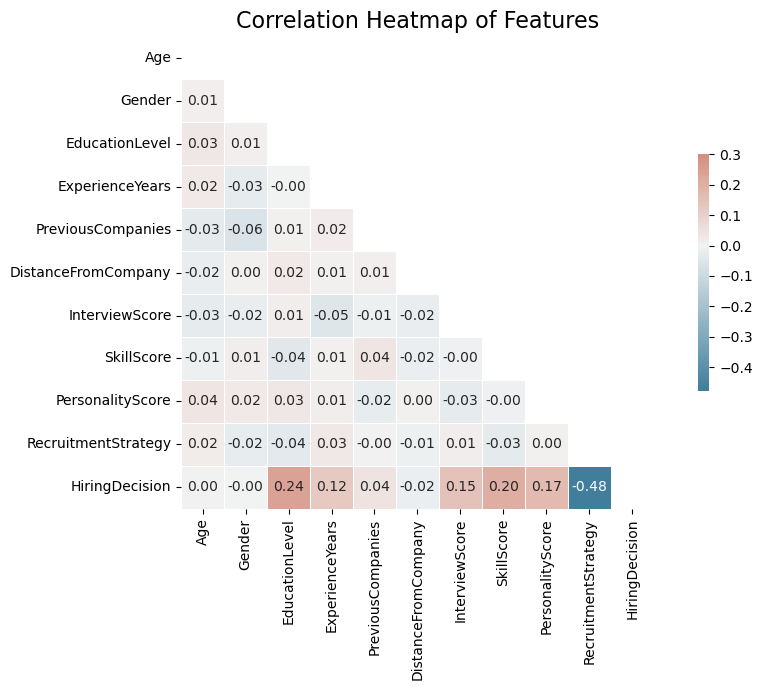

In [331]:
plt.figure(figsize=(10, 7))
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr_matrix, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True, fmt='.2f')
plt.title('Correlation Heatmap of Features', fontsize=16)
plt.tight_layout()

## Model Training (Logistic Regression)

In [333]:
from sklearn.model_selection import train_test_split

In [334]:
X = df.drop('HiringDecision', axis=1)
y = df['HiringDecision']

In [335]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [336]:
from sklearn.linear_model import LogisticRegression

In [337]:
logr = LogisticRegression()

In [338]:
logr.fit(X_train, y_train)

C:\Users\negar\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

### Model Evaluating

In [340]:
logr_pred = logr.predict(X_test)

In [341]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, ConfusionMatrixDisplay

In [342]:
print('Confusion Matrix:\n', confusion_matrix(y_test, logr_pred))
print('\n')
print('Classification Report:\n ', classification_report(y_test, logr_pred))
print('\n')
print('Accuracy Score:\n ', accuracy_score(y_test, logr_pred))

Confusion Matrix:
 [[297  24]
 [ 31  98]]


Classification Report:
                precision    recall  f1-score   support

           0       0.91      0.93      0.92       321
           1       0.80      0.76      0.78       129

    accuracy                           0.88       450
   macro avg       0.85      0.84      0.85       450
weighted avg       0.88      0.88      0.88       450



Accuracy Score:
  0.8777777777777778


### Display Confusion Matrix

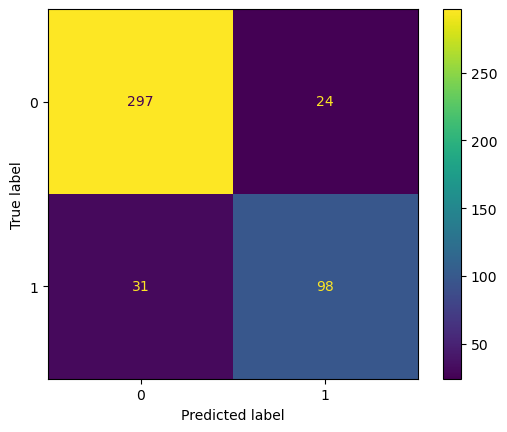

In [344]:
cm_logr = confusion_matrix(y_test, logr_pred, labels=logr.classes_)
disp_logr = ConfusionMatrixDisplay(confusion_matrix=cm_logr,
                              display_labels=logr.classes_)
disp_logr.plot()

## Model Training (Random Forest)

In [346]:
from sklearn.ensemble import RandomForestClassifier

In [347]:
rfc = RandomForestClassifier(n_estimators=100)

In [348]:
rfc.fit(X_train, y_train)

RandomForestClassifier()

### Model Evaluating

In [350]:
rfc_pred = rfc.predict(X_test)

In [351]:
print('Confusion Matrix:\n', confusion_matrix(y_test, rfc_pred))
print('\n')
print('Classification Report:\n ', classification_report(y_test, rfc_pred))
print('\n')
print('Accuracy Score:\n ', accuracy_score(y_test, rfc_pred))

Confusion Matrix:
 [[314   7]
 [ 24 105]]


Classification Report:
                precision    recall  f1-score   support

           0       0.93      0.98      0.95       321
           1       0.94      0.81      0.87       129

    accuracy                           0.93       450
   macro avg       0.93      0.90      0.91       450
weighted avg       0.93      0.93      0.93       450



Accuracy Score:
  0.9311111111111111


### Display Confusion Matrix

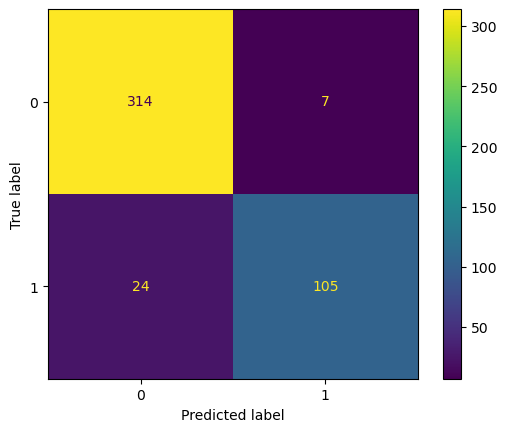

In [353]:
cm_rfc = confusion_matrix(y_test, rfc_pred, labels=rfc.classes_)
disp_rfc = ConfusionMatrixDisplay(confusion_matrix=cm_rfc,
                              display_labels=rfc.classes_)
disp_rfc.plot()

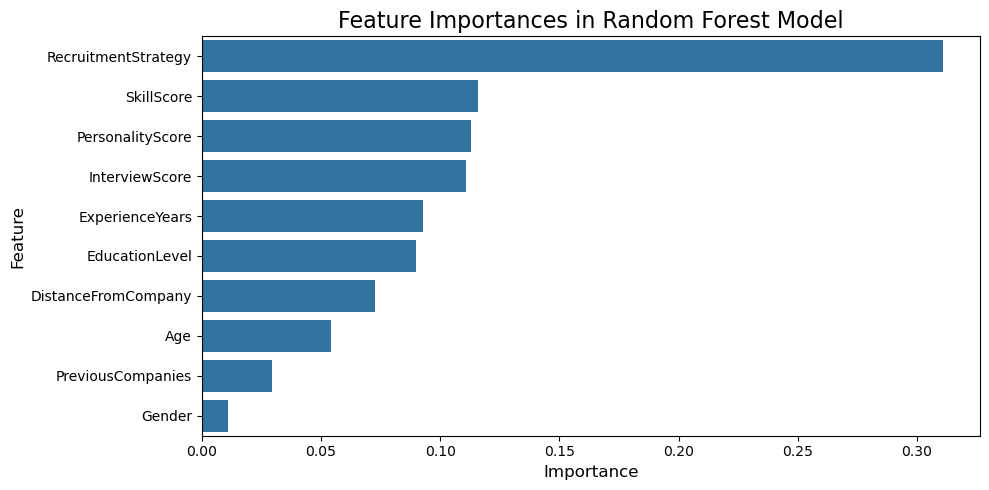

In [354]:
importances = rfc.feature_importances_
indices = np.argsort(importances)[::-1]
feature_names = X.columns

feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
})

feature_importance_df = feature_importance_df.sort_values('Importance', ascending=False)
plt.figure(figsize=(10, 5))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importances in Random Forest Model', fontsize=16)
plt.xlabel('Importance', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.tight_layout()